In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
%%bash

ls /data/results/baseline_performances

IPA-3
JQ1
LFM-A13
Temsirolimus
THZ-2-102-1


In [3]:
datapath = Path("/data/results/baseline_performances")

In [4]:
%%time

results = {}
for outer_directory in datapath.glob("*"): 
    drug = outer_directory.stem
    results[drug] = {}
    
    for inner_directory in outer_directory.glob("*"): 
        tissue = inner_directory.stem
        results[drug][tissue] = {}
        
        data = np.load(inner_directory / "baseline_performance.npz")
        
        for model in ['linear', 'KNN', 'RF']: 
            zero = data[f"{model}-zero"]
            zero = np.vstack([zero for _ in range(10)]) # There is only 1 possible zero-shot, so expanding for all trials
            performance = np.median(np.hstack([zero, data[f"{model}-fewshot"]]), axis=0)
            
            results[drug][tissue][model] = performance    

CPU times: user 12.7 ms, sys: 3.23 ms, total: 15.9 ms
Wall time: 14.9 ms


## Collapsing across all results

In [5]:
results_by_baseline = {'linear': [], 'KNN': [], 'RF': []}

for drug, d in results.items(): 
    for tissue, d in d.items(): 
        for model, p in d.items(): 
            results_by_baseline[model].append(p)
            
for model, ps in results_by_baseline.items(): 
    results_by_baseline[model] = np.vstack(ps)

[Text(0, 0, 'Pretrained'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10')]

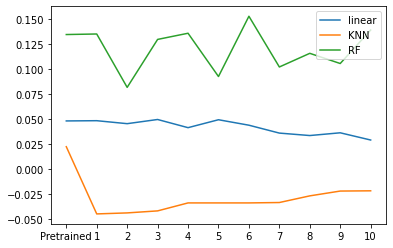

In [6]:
%matplotlib inline
fig, ax = plt.subplots()

for model, ps in results_by_baseline.items(): 
    ax.plot(np.arange(11), np.median(ps, axis=0), label=model)
    
ax.legend()
labels = ['Pretrained'] + [str(i) for i in range(1, 11)]
ax.set_xticks(np.arange(11))
ax.set_xticklabels(labels)